In [10]:
import torch
from torch.utils import data
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2
import os
import random


<function matplotlib.pyplot.show(close=None, block=None)>

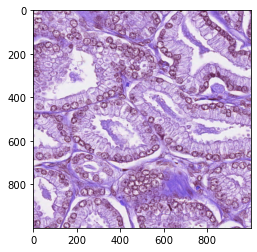

In [19]:
imgPath = '/Users/im-yuhan/Desktop/Cellsegmentation/dataset/MoNuSeg 2018 Training Data/MoNuSeg 2018 Training Data/Tissue Images'
imgList = os.listdir(imgPath)
img_path = os.path.join(imgPath,imgList[3])
img = cv2.imread(img_path)
plt.imshow(img)
plt.show



In [ ]:
class CellDataset(data.Dataset) :
    def __init__(self, training_dir, annotation_dir, data, transform=None, target_transform=None):
        super(CellDataset, self).__init__()

        self.training_dir = training_dir
        self.annotation_dir = annotation_dir
        self.imgList = os.listdir(training_dir)
        self.annoList = os.listdir(annotation_dir)
        self.transform = transform
        self.target_transform = target_transform
        print(data)

    def __len__(self):
        return len(self.imgList)

    def __getitem__(self, idx):
        
        image_path = os.path.join(self.training_dir, self.imgList[idx])
        label_path = os.path.join(self.annotation_dir,self.annoList[idx])

        image = Image.open(image_path).convert('RGB')
        label = Image.open(label_path).convert('L')

        if self.transform:
            seed = random.randint(0, 2 ** 32)
            self._set_seed(seed); image = self.transform(image)
            self._set_seed(seed); label = self.target_transform(label)

    